<a href="https://colab.research.google.com/github/Keerthana-Srnivasan/allometryABGcarbonstock/blob/main/Measuring_Carbon_Stock_Using_UAV_Imagery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from google.colab import files
upload = files.upload()

Saving carbobdata.csv to carbobdata.csv


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
field_data = pd.read_csv ("carbobdata.csv")
print (field_data.columns)
df = pd.DataFrame(data = field_data)

Index(['spcode', 'replicate', 'height', 'firstbranch_diameter',
       'base_diameter', 'wood_biomass', 'leaf_biomass', 'total_biomass'],
      dtype='object')


In [18]:
field_data

,spcode,replicate,height,firstbranch_diameter,base_diameter,wood_biomass,leaf_biomass,total_biomass
0,ASTTRY,1,66.30,0.99,0.88,0.0344,0.0570,0.0914
1,PHESQU,1,40.13,1.28,1.13,0.0482,0.0591,0.1073
2,PROCUN,1,112.73,2.00,1.70,0.1923,0.1775,0.3698
3,ASTTRY,2,64.12,1.09,0.70,0.0445,0.0764,0.1209
4,PHESQU,2,82.49,1.47,1.13,0.0958,0.1928,0.2886
...,...,...,...,...,...,...,...,...
129,ASTTRY,28,60.71,0.83,0.55,0.0525,0.1085,0.1610
130,PROCUN,30,88.47,2.02,1.81,0.2530,0.4067,0.6597
131,ASTTRY,29,63.16,1.12,0.76,0.0880,0.1153,0.2033
132,ASTTRY,30,103.29,1.99,1.35,0.3048,0.3856,0.6904


In [19]:
field_data = field_data.drop(["replicate"], axis=1)

In [20]:
field_data

,spcode,height,firstbranch_diameter,base_diameter,wood_biomass,leaf_biomass,total_biomass
0,ASTTRY,66.30,0.99,0.88,0.0344,0.0570,0.0914
1,PHESQU,40.13,1.28,1.13,0.0482,0.0591,0.1073
2,PROCUN,112.73,2.00,1.70,0.1923,0.1775,0.3698
3,ASTTRY,64.12,1.09,0.70,0.0445,0.0764,0.1209
4,PHESQU,82.49,1.47,1.13,0.0958,0.1928,0.2886
...,...,...,...,...,...,...,...
129,ASTTRY,60.71,0.83,0.55,0.0525,0.1085,0.1610
130,PROCUN,88.47,2.02,1.81,0.2530,0.4067,0.6597
131,ASTTRY,63.16,1.12,0.76,0.0880,0.1153,0.2033
132,ASTTRY,103.29,1.99,1.35,0.3048,0.3856,0.6904


In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [22]:
le = LabelEncoder()
columns_to_encode = ["spcode"]
for column in columns_to_encode:
  if column in field_data.columns:
    label = le.fit_transform(field_data[column])
    field_data.drop(column, axis=1, inplace=True)
    field_data[column] = label

In [23]:
field_data

,height,firstbranch_diameter,base_diameter,wood_biomass,leaf_biomass,total_biomass,spcode
0,66.30,0.99,0.88,0.0344,0.0570,0.0914,0
1,40.13,1.28,1.13,0.0482,0.0591,0.1073,2
2,112.73,2.00,1.70,0.1923,0.1775,0.3698,3
3,64.12,1.09,0.70,0.0445,0.0764,0.1209,0
4,82.49,1.47,1.13,0.0958,0.1928,0.2886,2
...,...,...,...,...,...,...,...
129,60.71,0.83,0.55,0.0525,0.1085,0.1610,0
130,88.47,2.02,1.81,0.2530,0.4067,0.6597,3
131,63.16,1.12,0.76,0.0880,0.1153,0.2033,0
132,103.29,1.99,1.35,0.3048,0.3856,0.6904,0


In [24]:
import seaborn as sns

<Axes: xlabel='height', ylabel='wood_biomass'>

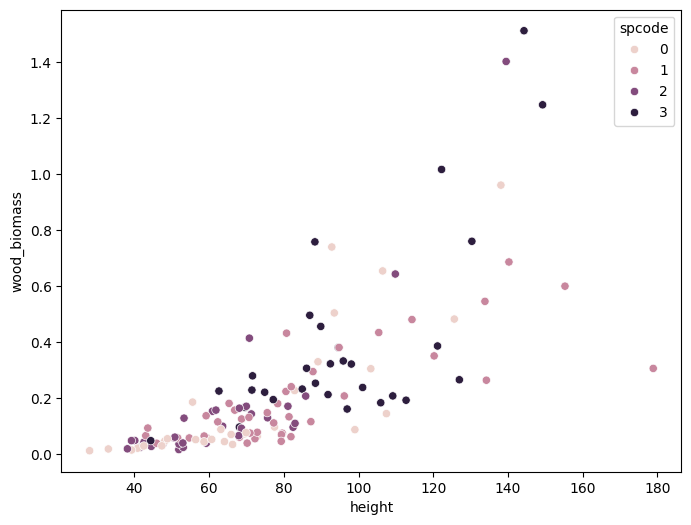

In [25]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="height", y="wood_biomass", data=field_data, hue="spcode")

<Axes: xlabel='base_diameter', ylabel='wood_biomass'>

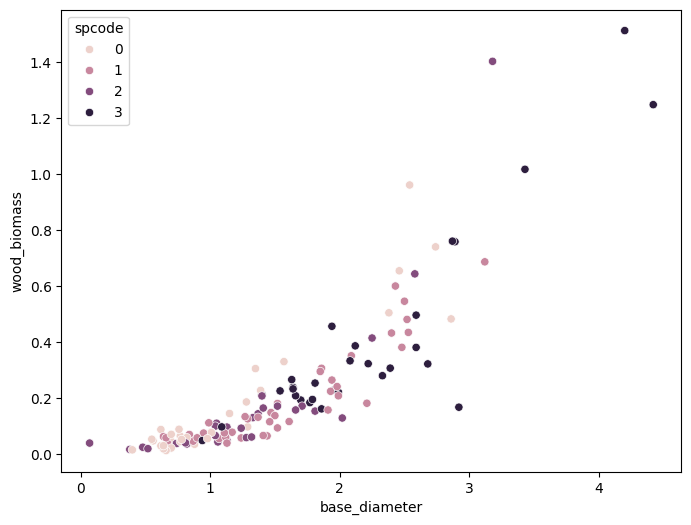

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="base_diameter", y="wood_biomass", data=field_data, hue="spcode")

In [27]:
epsilon = 1
model = DBSCAN(eps=epsilon, min_samples=5, metric='euclidean').fit(field_data[['height', 'wood_biomass']])
field_data['cluster'] = model.labels_.tolist()

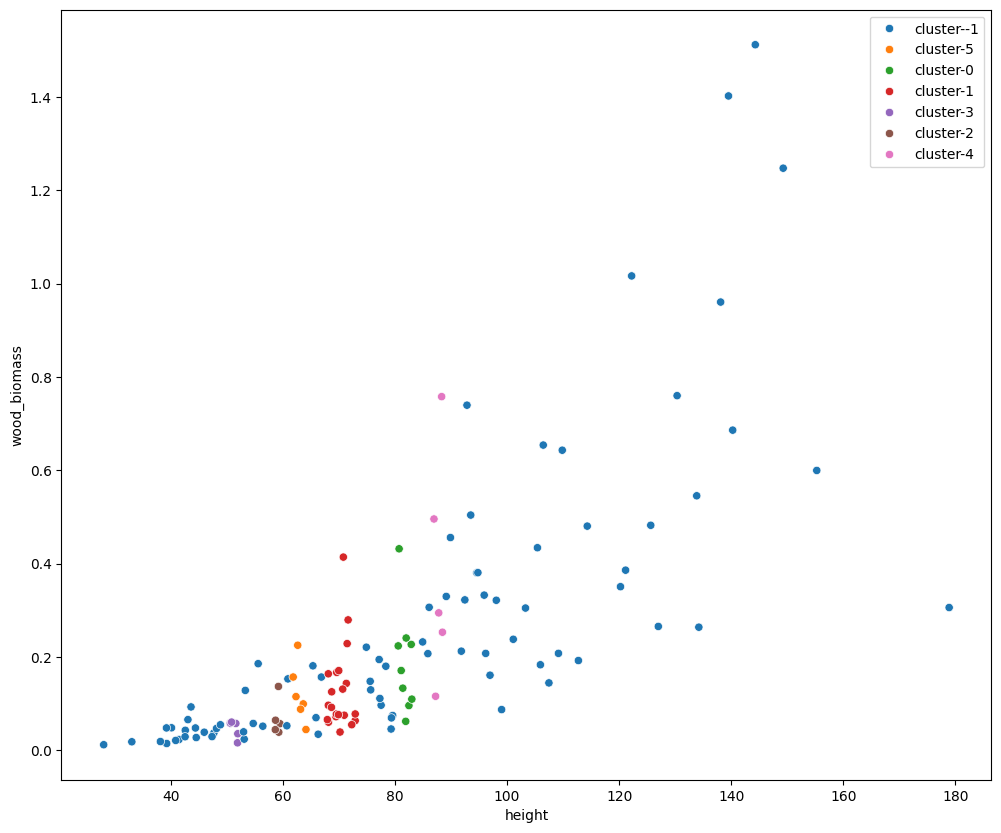

In [28]:
labels = model.labels_
fig = plt.figure(figsize=(12,10))
sns.scatterplot(data = field_data, x='height', y='wood_biomass', hue = ['cluster-{}'.format(x) for x in labels])
plt.legend(bbox_to_anchor = [1, 1])

In [29]:
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import model_selection
X_values = ['base_diameter', 'height']
for i in X_values:
  X = df[[i]]
  y = df['total_biomass']
  X_train,X_test,y_train,y_test = train_test_split(X,y)
  bay = linear_model.BayesianRidge()
  model = bay.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  mae = mean_absolute_error(y_test,y_pred)
  print (mae)

0.16715592143177016
0.2417236976092545
